In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import tensorflow as tf
from scipy.stats import linregress
pd.set_option('display.max_columns', None)

In [ ]:
# Read in spreadsheet
from google.colab import drive
import os
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Read CSV file directly without changing directory
file_path = '/content/drive/My Drive/Colab Notebooks/Resources/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Take a look at the dataset
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Check if there are any null values
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Data set is already clean and there's no rows with no data

In [ ]:
# Check the dtypes of the dataset. Looks like all values are set as float64
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# See how many of each case there are
diabetes_count = diabetes_df.groupby('Diabetes_binary')['Diabetes_binary'].count()
diabetes_count

Diabetes_binary
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [ ]:
# Calculate percent of total with and without diabetes
total_count = diabetes_df['Diabetes_binary'].count()
diabetes_percent = round(diabetes_df.groupby('Diabetes_binary')['Diabetes_binary'].count()/total_count * 100, 2)
diabetes_percent

Diabetes_binary
0.0    86.07
1.0    13.93
Name: Diabetes_binary, dtype: float64

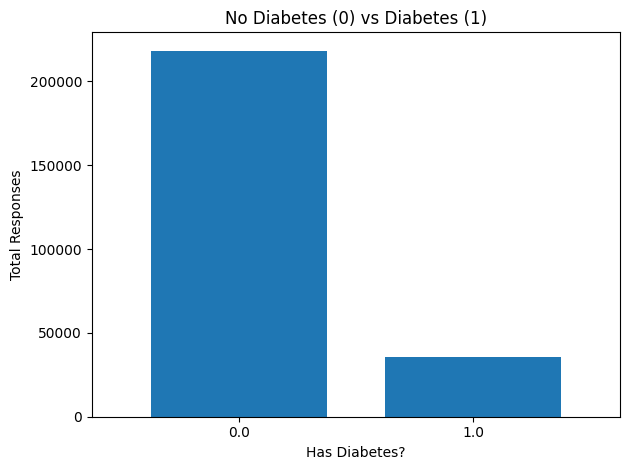

In [ ]:
# Plot the results to see the spread of the data
diabetes_count.plot(kind="bar", width=.75)
plt.xticks(rotation=0, ha='center')
plt.xlabel("Has Diabetes?")
plt.ylabel("Total Responses")
plt.title("No Diabetes (0) vs Diabetes (1)")

plt.tight_layout()

Can see in the visualization that most of the respondents do not have Diabetes (1 means yes Diabetes, 0 means no Diabetes). Creates an imbalanced dataset.

In [ ]:
# Avg of each column per whether or not diabetes was present
diabetes_avgs = diabetes_df.groupby('Diabetes_binary').mean()
diabetes_avgs

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,0.376602,0.384297,0.957730,27.805770,0.431019,0.032171,0.073351,0.776943,0.642158,0.820326,0.061484,0.949641,0.080665,2.385185,2.978034,3.641082,0.135361,0.434064,7.814065,5.099797,6.190474
1.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,0.023539,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


Can see from this that there seems to be a few columns (HighBP, HighChol, BMI, HeartDiseaseorAttack) where the avg value is noticeably higher for people with Diabetes vs people without Diabetes

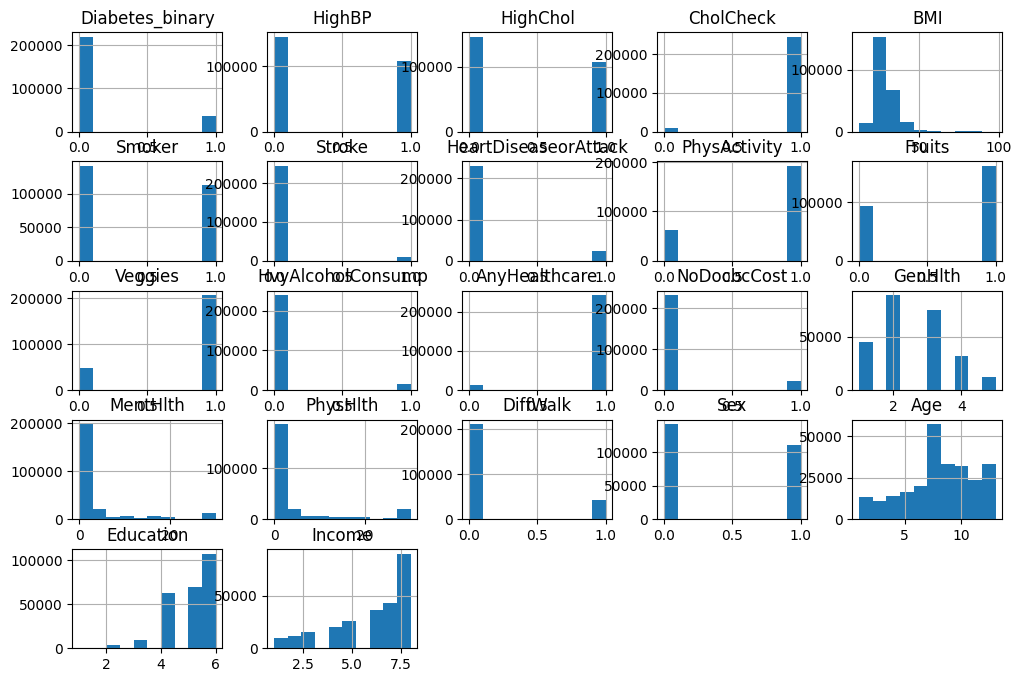

In [ ]:
# Plot some histograms to get an idea of the distribution of the data
diabetes_df.hist(figsize=(12, 8))
plt.show()

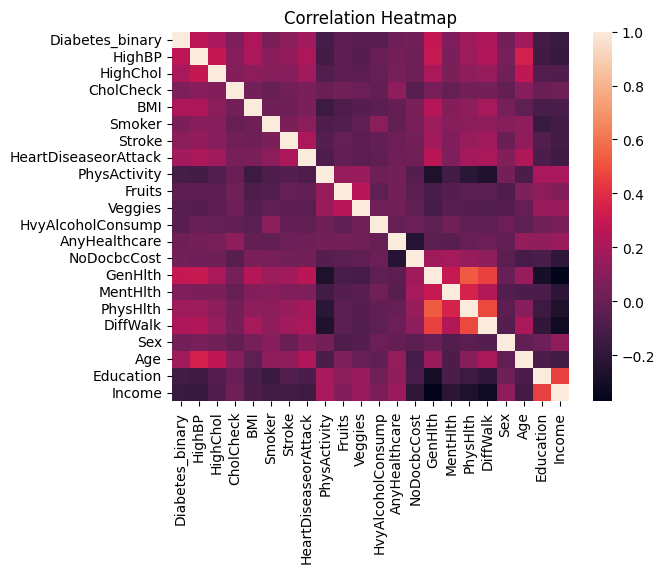

In [26]:
# Generate a heatmap to see the correlation between variables
corr = diabetes_df.corr()
sns.heatmap(corr)
# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

Can see from the heatmap that there's not a strong correlation between features here. It looks like the highest correlation is between GenHlth and PhysHlth.

The r-value is: 0.524363643849341


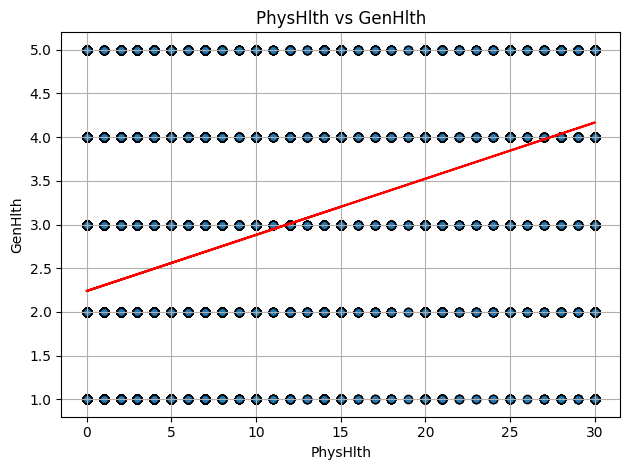

In [ ]:
# Wanted to look at the relationship between PhysHlth and GenHlth
# Plotted a scatter plot between the two, added a linear regression line and printed the r-value
x_values = diabetes_df["PhysHlth"]
y_values = diabetes_df["GenHlth"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# We first created a scatter plot to show the results from the DataFrame using the desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("PhysHlth vs GenHlth")
plt.ylabel("GenHlth")
plt.xlabel("PhysHlth")
plt.grid(True)

print(f"The r-value is: {rvalue}")

plt.tight_layout()

With an r-value of .524 it looks like there's a moderate positive correlation between PhysHlth and GenHlth indicating as one values increases the other values increases as well.

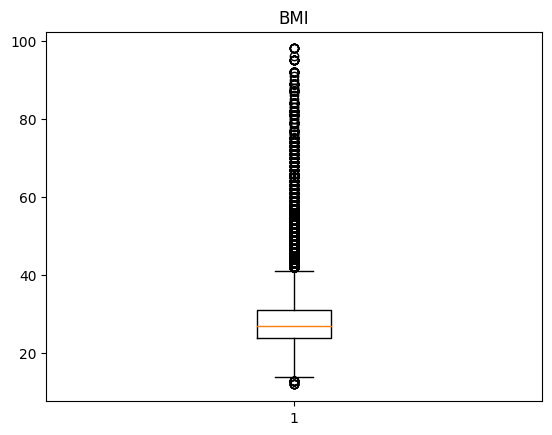

In [ ]:
# Generate a box plot for BMI to identify outliers since that's the only real data point that's not categorical
plt.boxplot(diabetes_df['BMI'])
plt.title('BMI')
plt.show()


Looks like there are some outliers that might need to be removed from the dataset